In [6]:
train_dir = './dataset/train'
test_dir = './dataset/test'

train_cats_dir = './dataset/train/cat'
train_noncats_dir = './dataset/train/non-cat'

validation_cats_dir = './dataset/test/cat'
validation_noncats_dir = './dataset/test/non-cat'

test_cats_dir = './dataset/test/cat'
test_noncats_dir = './dataset/test/non-cat'

In [3]:
from keras import layers
from keras import models
from keras import optimizers

model=models.Sequential([
                        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
                        layers.MaxPooling2D((2, 2)),
                        layers.Conv2D(64, (3, 3), activation='relu'),
                        layers.MaxPooling2D((2, 2)),
                        layers.Conv2D(128, (3, 3), activation='relu'),
                        layers.MaxPooling2D((2, 2)),
                        layers.Conv2D(128, (3, 3), activation='relu'),
                        layers.MaxPooling2D((2, 2)),
                        layers.Flatten(),
                        layers.Dense(512, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=100,
      validation_data=test_generator,
      validation_steps=3, verbose=2)

Found 209 images belonging to 2 classes.
Found 50 images belonging to 2 classes.

Epoch 1/100
 - 4s - loss: 0.6583 - acc: 0.6455 - val_loss: 0.9017 - val_acc: 0.3400
Epoch 2/100
 - 1s - loss: 0.6285 - acc: 0.6772 - val_loss: 0.8593 - val_acc: 0.3400
Epoch 3/100
 - 1s - loss: 0.6318 - acc: 0.6402 - val_loss: 0.9803 - val_acc: 0.3400
Epoch 4/100
 - 1s - loss: 0.6286 - acc: 0.6402 - val_loss: 0.5469 - val_acc: 0.3400
Epoch 5/100
 - 1s - loss: 0.6036 - acc: 0.6750 - val_loss: 0.8579 - val_acc: 0.3400
Epoch 6/100
 - 1s - loss: 0.5675 - acc: 0.6614 - val_loss: 0.7726 - val_acc: 0.3400
Epoch 7/100
 - 1s - loss: 0.5795 - acc: 0.6561 - val_loss: 0.7899 - val_acc: 0.3400
Epoch 8/100
 - 1s - loss: 0.5064 - acc: 0.7135 - val_loss: 1.0344 - val_acc: 0.3600
Epoch 9/100
 - 1s - loss: 0.5403 - acc: 0.6950 - val_loss: 1.0752 - val_acc: 0.4000
Epoch 10/100
 - 1s - loss: 0.5247 - acc: 0.7037 - val_loss: 0.8468 - val_acc: 0.4800
Epoch 11/100
 - 1s - loss: 0.5064 - acc: 0.7460 - val_loss: 0.4838 - val_acc:

 - 1s - loss: 0.1323 - acc: 0.9438 - val_loss: 0.1913 - val_acc: 0.8000
Epoch 95/100
 - 1s - loss: 0.2935 - acc: 0.8800 - val_loss: 0.1440 - val_acc: 0.8600
Epoch 96/100
 - 1s - loss: 0.1913 - acc: 0.9365 - val_loss: 0.1489 - val_acc: 0.8800
Epoch 97/100
 - 1s - loss: 0.2135 - acc: 0.8889 - val_loss: 2.3112 - val_acc: 0.5800
Epoch 98/100
 - 1s - loss: 0.1945 - acc: 0.9312 - val_loss: 0.8493 - val_acc: 0.9000
Epoch 99/100
 - 1s - loss: 0.2359 - acc: 0.8942 - val_loss: 0.1063 - val_acc: 0.8800
Epoch 100/100
 - 1s - loss: 0.1991 - acc: 0.9150 - val_loss: 1.7685 - val_acc: 0.6200


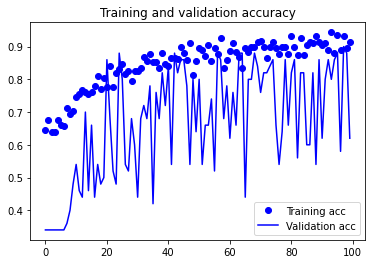

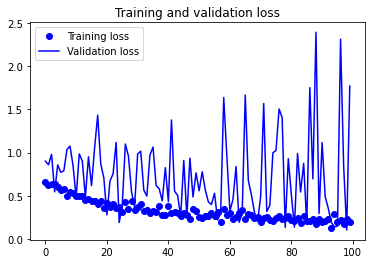

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()